In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

# Analyze a series of experiments over an average of all seed runs

# plt.rc('font', family='serif', serif='Times')
# plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# Get seedlist
file = 'seedlist.dat'
with open(file) as f:
    seed_list = []
    for line in f: # read rest of lines
        seed_list.append([int(x) for x in line.split()][0])
# print(seed_list)

In [2]:
experiment_label = {
                    'cenp_t24_random-base_g0.997-n0.7':'enp',
                    'cenp_t24_random-non_markov_g0.997-n0.7':'pomdp_enp'
                   }
experiment_color = {
                    'cenp_t24_random-base_g0.997-n0.7':'tab:green',
                    'cenp_t24_random-non_markov_g0.997-n0.7':'tab:blue'                   
                   }

In [3]:
# Define list of experiments to analyze for given seed
experiment_list = [
    'cenp_t24_random-base_g0.997-n0.7',  
    'cenp_t24_random-non_markov_g0.997-n0.7',
]

In [4]:
# Set mode to train or test
mode = "train"
print(mode)

results = {} # dictionary to hold experimental data
# results[experiment][seed_no]

for experiment in experiment_list:
    results[experiment]={}        
    for seed_no in seed_list:
        # Load data of experiment and store in a dictionary
        tag = experiment + '-' + str(seed_no)
        cur_folder = os.getcwd()
        exp_results_folder = os.path.join(cur_folder,"results", experiment, mode) # experiment folder
        exp_results_file = os.path.join(exp_results_folder, tag + '-'+ mode + '.npy') # experiment data file
        exp_result = np.load(exp_results_file,allow_pickle='TRUE').item()
        results[experiment][seed_no] = exp_result # load to dictionary

# Get list of locations and years in the experimental data
location_list   = list(results[experiment_list[0]][seed_list[0]].keys())
year_list       = list(results[experiment_list[0]][seed_list[0]][location_list[0]].keys())
train_year_list = year_list
# Add keys to dictionaries
for experiment in experiment_list:
    results[experiment]["minimum"] = {}
    results[experiment]["first_q"] = {}
    results[experiment]["average"] = {}
    results[experiment]["third_q"] = {}
    results[experiment]["maximum"] = {}
    for location in location_list:
        results[experiment]["minimum"][location] = {}
        results[experiment]["first_q"][location] = {}
        results[experiment]["average"][location] = {}
        results[experiment]["third_q"][location] = {}
        results[experiment]["maximum"][location] = {}
        for year in year_list:
            results[experiment]["minimum"][location][year] = {}
            results[experiment]["first_q"][location][year] = {}
            results[experiment]["average"][location][year] = {}
            results[experiment]["third_q"][location][year] = {}
            results[experiment]["maximum"][location][year] = {}
            


# get min, avg and max downtimes
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            dummy = []
            for seed in seed_list:
                dummy.append(results[experiment][seed][location][year]['downtimes'])
            results[experiment]["minimum"][location][year]['downtimes'] = np.min(dummy)
            results[experiment]["first_q"][location][year]['downtimes'] = np.percentile(dummy, 25)
            results[experiment]["average"][location][year]['downtimes'] = np.mean(dummy)
            results[experiment]["third_q"][location][year]['downtimes'] = np.percentile(dummy, 75)
            results[experiment]["maximum"][location][year]['downtimes'] = np.max(dummy)

train_results = results

train


In [5]:
# Set mode to train or test
mode = "test"
print(mode)

results = {} # dictionary to hold experimental data
# results[experiment][seed_no]

for experiment in experiment_list:
    results[experiment]={}        
    for seed_no in seed_list:
        # Load data of experiment and store in a dictionary
        tag = experiment + '-' + str(seed_no)
        cur_folder = os.getcwd()
        exp_results_folder = os.path.join(cur_folder,"results", experiment, mode) # experiment folder
        exp_results_file = os.path.join(exp_results_folder, tag + '-'+ mode + '.npy') # experiment data file
        exp_result = np.load(exp_results_file,allow_pickle='TRUE').item()
        results[experiment][seed_no] = exp_result # load to dictionary

# Get list of locations and years in the experimental data
location_list   = list(results[experiment_list[0]][seed_list[0]].keys())
year_list       = list(results[experiment_list[0]][seed_list[0]][location_list[0]].keys())[10:]
test_year_list = year_list

# Add keys to dictionaries
for experiment in experiment_list:
    results[experiment]["minimum"] = {}
    results[experiment]["first_q"] = {}
    results[experiment]["average"] = {}
    results[experiment]["third_q"] = {}
    results[experiment]["maximum"] = {}
    for location in location_list:
        results[experiment]["minimum"][location] = {}
        results[experiment]["first_q"][location] = {}
        results[experiment]["average"][location] = {}
        results[experiment]["third_q"][location] = {}
        results[experiment]["maximum"][location] = {}
        for year in year_list:
            results[experiment]["minimum"][location][year] = {}
            results[experiment]["first_q"][location][year] = {}
            results[experiment]["average"][location][year] = {}
            results[experiment]["third_q"][location][year] = {}
            results[experiment]["maximum"][location][year] = {}
            


# get min, avg and max downtimes
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            dummy = []
            for seed in seed_list:
                dummy.append(results[experiment][seed][location][year]['downtimes'])
            results[experiment]["minimum"][location][year]['downtimes'] = np.min(dummy)
            results[experiment]["first_q"][location][year]['downtimes'] = np.percentile(dummy, 25)
            results[experiment]["average"][location][year]['downtimes'] = np.mean(dummy)
            results[experiment]["third_q"][location][year]['downtimes'] = np.percentile(dummy, 75)
            results[experiment]["maximum"][location][year]['downtimes'] = np.max(dummy)

test_results = results

test


In [6]:
location = 'tokyo'
print(location)

tokyo


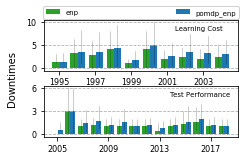

In [7]:
# Downtimes and Sense Rewards

single_column_figure_width = 3.487
double_column_figure_width = 7

fig_width = single_column_figure_width
fig_height = fig_width / 1.618 

fig, axs = plt.subplots(nrows=2,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0.0, 0.5, 'Downtimes', ha='center', va='center', rotation='vertical')

#######################################################################################
# # left  = 0.125  # the left side of the subplots of the figure
# # right = 0.9    # the right side of the subplots of the figure
# # bottom = 0.1   # the bottom of the subplots of the figure
# # top = 0.9      # the top of the subplots of the figure
# # wspace = 0.2   # the amount of width reserved for blank space between subplots
# # hspace = 0.2   # the amount of height reserved for white space between subplots
#######################################################################################

train_ax = axs[0]
test_ax = axs[1]

# Train Downtimes
for experiment in experiment_list:
    min_data = [train_results[experiment]["minimum"][location][year]['downtimes'] for year in train_year_list]
    qt1_data = [train_results[experiment]["first_q"][location][year]['downtimes'] for year in train_year_list]
    avg_data = [train_results[experiment]["average"][location][year]['downtimes'] for year in train_year_list]
    qt3_data = [train_results[experiment]["third_q"][location][year]['downtimes'] for year in train_year_list]
    max_data = [train_results[experiment]["maximum"][location][year]['downtimes'] for year in train_year_list]
    
    width = 0.8/len(experiment_list)  # the width of the bars 
    xroot = np.array(train_year_list) # label locations
    xoffset = -0.8/2 + experiment_list.index(experiment) 
    train_ax.bar(xroot+xoffset*width, avg_data,width, yerr = [qt1_data,qt3_data],
                     color=experiment_color[experiment], 
                     label=experiment_label[experiment],
                     error_kw=dict(ecolor='black', lw=1, capsize=0.5, capthick=width*0.5, alpha=0.2)
                    )

train_ax.set_xticks(train_year_list[::2])
train_ax.set_xticklabels(train_year_list[::2], rotation=0)

train_ax.text(0.8,0.8, 'Learning Cost', 
                 size='x-small', ha="center", 
                 transform=train_ax.transAxes)
# # train_ax.set_title('downtimes')
# # train_ax.set_ylabel('downtimes')    
train_ax.legend(loc="lower left",
                    ncol=2,
                    fontsize='x-small',
                    bbox_to_anchor=(-0.02,0.95,1.04,1),
                    mode="expand",
                    labelspacing=0.1,
                    framealpha = 0.9)
train_ax.grid(which='major', axis='y', linestyle='--')

# test Downtimes
for experiment in experiment_list:
    min_data = [test_results[experiment]["minimum"][location][year]['downtimes'] for year in test_year_list]
    qt1_data = [test_results[experiment]["first_q"][location][year]['downtimes'] for year in test_year_list]
    avg_data = [test_results[experiment]["average"][location][year]['downtimes'] for year in test_year_list]
    qt3_data = [test_results[experiment]["third_q"][location][year]['downtimes'] for year in test_year_list]
    max_data = [test_results[experiment]["maximum"][location][year]['downtimes'] for year in test_year_list]
    
    width = 0.8/len(experiment_list)  # the width of the bars 
    xroot = np.array(test_year_list) # label locations
    xoffset = -0.8/2 + experiment_list.index(experiment) 
    test_ax.bar(xroot+xoffset*width, avg_data,width, yerr = [qt1_data,qt3_data],
                     color=experiment_color[experiment], 
                     label=experiment_label[experiment],
                     error_kw=dict(ecolor='black', lw=1, capsize=0.5, capthick=width*0.5, alpha=0.2)
                    )

test_ax.set_yticks(np.linspace(0,6,3))
test_ax.set_xticks(test_year_list[::4])
test_ax.set_xticklabels(test_year_list[::4], rotation=0)

test_ax.text(0.8,0.8, 'Test Performance', 
                 size='x-small', ha="center", 
                 transform=test_ax.transAxes)

test_ax.grid(which='major', axis='y', linestyle='--')

fig.savefig('./figures/base-markov.png', dpi=300, bbox_inches='tight', transparent=True)